In [41]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Statistical Deep Learning/HW4/GoogleNews-vectors-negative300.magnitude'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Install Magnitude on Google Colab
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude."

Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0   1201      0 --:--:-- --:--:-- --:--:--  1201
Done installing Magnitude.


In [43]:
from pymagnitude import *

In [44]:
vectors = Magnitude(data_path)

# Questions

### Question 1: What is the dimensionality of these word embeddings? Provide and integer answer.

### Answer: 300. Each word has a corresponding vector of length 300

In [45]:
# Two ways of finding the dimension of the vector.

print(vectors.dim)
print(len(vectors[42][1]))

300
300


### Question 2: What are the top-5 most similar words to picnic (not including picnic itself)?

### Answer: 'cookout', 'Hiking_biking_camping', 'barbeque', 'barbecue', 'pig_roast'. I interpreted this question to mean the top 5 most similar words that do not have the sequence of letters "p-i-c-n-i-c" in it. This eliminated some of the phrases like "picnics" or "potluck_picnic".

In [46]:
picnic_similar = vectors.most_similar('picnic', topn = 20) 

most_sim = []
i = 0
while len(most_sim) < 5:
  word = picnic_similar[i][0]
  if "picnic" not in word.lower():
    most_sim.append(word)
  i += 1

print(most_sim)

['cookout', 'Hiking_biking_camping', 'barbeque', 'barbecue', 'pig_roast']


In [47]:
most_sim

['cookout', 'Hiking_biking_camping', 'barbeque', 'barbecue', 'pig_roast']

### Question 3: According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

### Answer: tissue
I am assuming the doesnt_match function uses some sort of average similarity score to calculate this. For example, for each word it calculates the the similarity to each other word and averages them. This would run in 6 choose 2 time if programmed correctly.

In [48]:
vectors.doesnt_match(['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

### Question 4: Solve the following analogy: leg is to jump as X is to throw.

### Answer: See code below.

In [49]:
results = vectors.most_similar(positive = ["leg", "throw"], negative = ["jump"])
results

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

In [50]:
import pandas as pd

results_df = pd.DataFrame(np.array(results), columns=['word', 'similarity'])
import plotly.express as px

fig = px.bar(results_df, x='word', y='similarity')
fig.show()

### Plotting
I experimented with displaying the association between the vectors with each word in a way that preserves associations. 

I used Principal Component Analysis to decompose the 3000000 by 300 matrix of word vectors into their principal components. I then transformed several of the word vectors using the top two principal components (eigenvectors corresponding to the top two eigenvalues). I then plotted these transformed word vectors to see if the closeness matched the doesnt_match function from the problem 3. 

Note that due to RAM constraints I actually randomly sampled 500,000 of the 3 million words to create the covariance matrix for PCA. Therefore, this PCA is technically "sample PCA" and there is sample uncertainty associated with the estimate.

In [51]:
import numpy as np
from sklearn.decomposition import PCA

In [52]:
vec_array = np.zeros(shape = (3000000, 300))
for i in range(3000000):
  if i % 10000 == 0:
    print("Step: ", i,"Complete")
  vec_array[i] = vectors[i][1].astype("int")

vec_array

Step:  0 Complete
Step:  10000 Complete
Step:  20000 Complete
Step:  30000 Complete
Step:  40000 Complete
Step:  50000 Complete
Step:  60000 Complete
Step:  70000 Complete
Step:  80000 Complete
Step:  90000 Complete
Step:  100000 Complete
Step:  110000 Complete
Step:  120000 Complete
Step:  130000 Complete
Step:  140000 Complete
Step:  150000 Complete
Step:  160000 Complete
Step:  170000 Complete
Step:  180000 Complete
Step:  190000 Complete
Step:  200000 Complete
Step:  210000 Complete
Step:  220000 Complete
Step:  230000 Complete
Step:  240000 Complete
Step:  250000 Complete
Step:  260000 Complete
Step:  270000 Complete
Step:  280000 Complete
Step:  290000 Complete
Step:  300000 Complete
Step:  310000 Complete
Step:  320000 Complete
Step:  330000 Complete
Step:  340000 Complete
Step:  350000 Complete
Step:  360000 Complete
Step:  370000 Complete
Step:  380000 Complete
Step:  390000 Complete
Step:  400000 Complete
Step:  410000 Complete
Step:  420000 Complete
Step:  430000 Complete
St

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
idx = np.random.choice(3000000, 400000, replace=False)
print(type(idx[0]))
vec_array = vec_array[idx]

del idx

<class 'numpy.int64'>


In [54]:
words = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
word_vecs = [vectors.query(word) for word in words]

pca = PCA(n_components=2)

pca.fit(vec_array)
del vec_array # invoking garbage collection since there are RAM limitations

plotting_array = []
for i in range(len(words)):
  word_vec = word_vecs[i]
  vec_2d = pca.transform(np.array([word_vec]))
  print(vec_2d)
  plotting_array.append((vec_2d[0][0], vec_2d[0][1], words[i]))

import pandas as pd
plotting_df = pd.DataFrame(np.array(plotting_array), columns=['X', 'Y', "Word"])

[[-0.068577   0.0755747]]
[[0.13307419 0.0836466 ]]
[[-0.0633838  0.0175465]]
[[0.0304885 0.0316318]]
[[0.0599903 0.044931 ]]
[[-0.0019478  0.0181685]]


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning:

invalid value encountered in true_divide



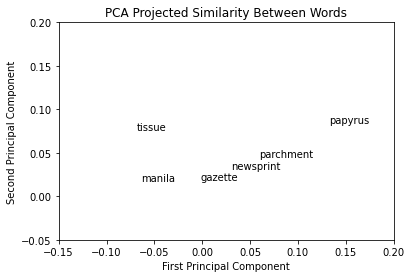

In [55]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.axes()
# For x-axis limit
ax.set_xlim(-.15, .2)

# For y-axis limit
ax.set_ylim(-.05, .2)

for data in plotting_array:
  ax.text(data[0], data[1], data[2])

ax.set_title("PCA Projected Similarity Between Words")
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")

plt.show()

We can see in the plot above that tissue does seem to be the furthest from the other words, confirming what we had suspected to be the case in question 3.